In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from skimage import color
from skimage import io
import skimage as s
import skimage.measure as sm 
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import scipy
from scipy import ndimage
import scipy.misc as scm
import glob
from google.colab.patches import cv2_imshow

In [0]:
def probability(obj,patch):
  mean = np.mean(patch)
  stdev = np.std(patch)
  p = (1/(stdev*np.sqrt(2*np.pi))*np.exp(-((obj-mean)**2)/(2*(stdev**2))))
  return p

In [0]:
path = "/content/drive/My Drive/186/Activity 11/RAW/*.jpg"
savepath = "/content/drive/My Drive/186/Activity 11/PROCESSED/"

#INITIAL IMAGE TO SET ROI SHADE AND COLOR"
#img = io.imread('00016.jpg')
img = io.imread('03.jpg')
image = s.img_as_float(img)
image = np.double(image)
image = image[85:1170,130:210]
#cropped = image[27:60,130:165]
cropped = image[30:70,30:50]
cropped_imgR = cropped[:,:,0]
cropped_imgG = cropped[:,:,1]
cropped_imgB = cropped[:,:,2]


#Loop for all images"
for file in glob.glob(path):
  #print(file)
  filename = file[-6:]
  print(filename)
  img = io.imread(file)
  image = s.img_as_float(img)
  image = np.double(image)
  image = image[85:1170,130:210]

  image_R = image[:,:,0]
  image_G = image[:,:,1]
  image_B = image[:,:,2]

  I_patch = cropped_imgR + cropped_imgG + cropped_imgB
  I_obj = image_R + image_G + image_B

  I_patch[I_patch==0] = 100000
  I_obj[I_obj==0] = 100000
  
  r_patch = cropped_imgR/I_patch 
  g_patch = cropped_imgG/I_patch
  
  r_obj = image_R/I_obj 
  g_obj = image_G/I_obj
  
  mean_r = np.mean(r_patch)
  mean_g = np.mean(g_patch)
  stdev_r = np.std(r_patch)
  stdev_g = np.std(g_patch)
  
  joint_prob = probability(r_obj,r_patch)*probability(g_obj,g_patch)
  cv2.imwrite(savepath+str(filename),joint_prob) 

10.jpg
11.jpg
12.jpg
01.jpg
02.jpg
03.jpg
04.jpg
05.jpg
06.jpg
07.jpg
08.jpg
09.jpg


#SEGMENTATION TEST

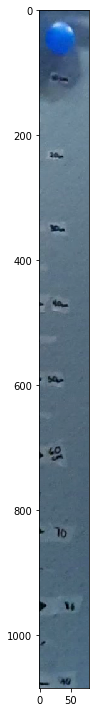

In [0]:
img = cv2.imread('03.jpg')
image = s.img_as_float(img)
image = np.double(image)
image = image[85:1170,130:210]
plt.figure(figsize = [20,10])
io.imshow(image)
#plt.axis('off')

In [0]:
np.shape(image)

(1085, 80, 3)

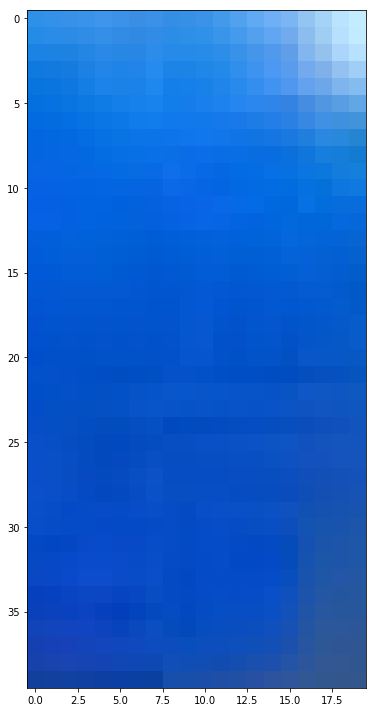

In [0]:
#16 cropped = image[20:65,125:179]
#18
cropped = image[30:70,30:50]
plt.figure(figsize = [20,10])
io.imshow(cropped)

#MORPH

In [0]:
newpath = "/content/drive/My Drive/186/Activity 11/PROCESSED/*.jpg"
newsavepath = "/content/drive/My Drive/186/Activity 11/MORPH/"
for newfile in glob.glob(newpath):
  A = cv2.imread(newfile)
  newfilename = newfile[-6:]
  A2 = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
  ret,thresh1 = cv2.threshold(A,19,255,cv2.THRESH_BINARY)
  
  # Copy the thresholded image.
  im_floodfill = thresh1.copy()
  
  # Mask used to flood filling.
  # Notice the size needs to be 2 pixels than the image.
  h, w = thresh1.shape[:2]
  mask = np.zeros((h+2, w+2), np.uint8)  
  
  # Floodfill from point (0, 0)
  cv2.floodFill(im_floodfill, mask, (0,0), 255);
  
  # Invert floodfilled image
  im_floodfill_inv = cv2.bitwise_not(im_floodfill)
  
  # Combine the two images to get the foreground.
  im_out = thresh1 | im_floodfill_inv
  
  im_out = cv2.cvtColor(im_out, cv2.COLOR_BGR2GRAY)
  ret2,thresh2 = cv2.threshold(im_out,254,255,cv2.THRESH_BINARY)
  
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
  opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel)
  cv2.imwrite(newsavepath+str(newfilename),opening)   

#MORPH TEST

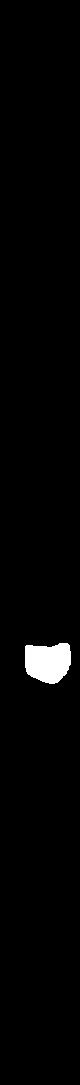

<Figure size 1440x720 with 0 Axes>

In [0]:
A = cv2.imread("/content/drive/My Drive/186/Activity 11/PROCESSED/09.jpg")
plt.figure(figsize = [20,10])
#plt.imshow(A)
A2 = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
#plt.imshow(A2)
ret,thresh1 = cv2.threshold(A,19,255,cv2.THRESH_BINARY)
#cv2_imshow(thresh1)

# Copy the thresholded image.
im_floodfill = thresh1.copy()
 
# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = thresh1.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255);
 
# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
 
# Combine the two images to get the foreground.
im_out = thresh1 | im_floodfill_inv

im_out = cv2.cvtColor(im_out, cv2.COLOR_BGR2GRAY)
ret2,thresh2 = cv2.threshold(im_out,254,255,cv2.THRESH_BINARY)
#cv2_imshow(thresh2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
opening = cv2.morphologyEx(thresh2, cv2.MORPH_OPEN, kernel)
#erode
cv2_imshow(opening)

# Blob ANALYSIS TEST

In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Filter by Color
params.filterByColor = False
params.blobColor = 255
 
# Filter by Area.
params.filterByArea = False
params.minArea = 15
params.maxArea = 250
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0

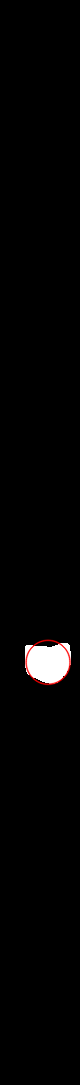

In [0]:
detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(opening)
im_with_keypoints = cv2.drawKeypoints(opening, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#cv2_imshow(opening)
cv2_imshow(im_with_keypoints)

In [0]:
label, N = sm.label(opening, background=0, return_num=True)
reg = sm.regionprops(label,opening)
centroid = []
for i in range(N):
  centroid.append(reg[i].centroid)

In [0]:
list(centroid)[0][0] #y,x

87.49017341040462

#Blob Analysis

In [0]:
imgpath = "/content/drive/My Drive/186/Activity 11/MORPH/*.jpg"
centroids = []
reference_file = []
ypos = []
for imgfile in glob.glob(imgpath):
  A = cv2.imread(imgfile)
  A = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY)
  ret,A2 = cv2.threshold(A,20,255,cv2.THRESH_BINARY)
  imgfilename = imgfile[-6:]
   # Setup SimpleBlobDetector parameters.
  params = cv2.SimpleBlobDetector_Params()

  # Filter by Circularity
  params.filterByCircularity = True
  params.minCircularity = 0
  
  detector = cv2.SimpleBlobDetector_create(params)
  keypoints = detector.detect(A2)
  im_with_keypoints = cv2.drawKeypoints(A2, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  #cv2_imshow(opening)
  #cv2_imshow(im_with_keypoints)
  
  label, N = sm.label(A2, background=0, return_num=True)
  reg = sm.regionprops(label,A2)
  if N == 0:
    print(imgfilename, 'has no labels.')
    
  imgcent = []
  if N != 0:
    reference_file.append(imgfilename)
    #print(imgfilename, 'has at least',N,'labels.')
    for i in range(N):
      imgcent.append(reg[i].centroid)
    centroids.append(imgcent) 
    ys = list(imgcent)[0][0]
    ypos.append(ys)

    
  #print(imgcent)
    print('The ball at',imgfilename,'was located at an average y-axis coordinate',round(ys))

The ball at 06.jpg was located at an average y-axis coordinate 285.0
01.jpg has no labels.
The ball at 10.jpg was located at an average y-axis coordinate 816.0
The ball at 02.jpg was located at an average y-axis coordinate 16.0
The ball at 04.jpg was located at an average y-axis coordinate 119.0
The ball at 05.jpg was located at an average y-axis coordinate 191.0
The ball at 07.jpg was located at an average y-axis coordinate 399.0
The ball at 08.jpg was located at an average y-axis coordinate 513.0
The ball at 11.jpg was located at an average y-axis coordinate 1005.0
The ball at 09.jpg was located at an average y-axis coordinate 662.0
12.jpg has no labels.
The ball at 03.jpg was located at an average y-axis coordinate 51.0


In [0]:
ypos = np.sort(ypos)
ypos

array([  15.68817204,   51.09561231,  119.11048557,  190.82242991,
        285.36774194,  398.6981383 ,  513.35119048,  661.74410995,
        815.63214838, 1004.65633075])

Text(0, 0.5, 'Distance (m)')

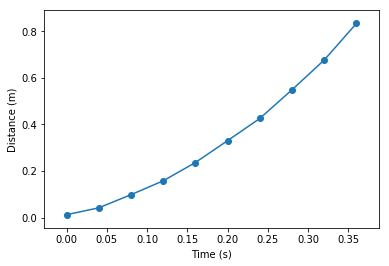

In [0]:
delta_t = 1/25
time = np.arange(0,10/25,delta_t)
pix_2_dist = .9/1085
scaled = ypos*pix_2_dist
plt.scatter(time,scaled)
plt.plot(time,scaled)
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")

In [0]:
time

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36])

In [0]:
vel = []
for i in range(len(scaled)-1):
  delta_d = scaled[i+1] - scaled[i]
  v = delta_d/delta_t
  vel.append(v)

In [0]:
vel

[0.734255673775125,
 1.4104466805446012,
 1.487114052988527,
 1.9606170697245995,
 2.350169509819115,
 2.377597856232404,
 3.0772725236015708,
 3.1912266033763377,
 3.91985631647479]

In [0]:
accel = []
for i in range(len(vel)-1):
  delta_v = vel[i+1] - vel[i]
  a = delta_v/delta_t
  accel.append(a)

In [0]:
accel

[16.904775169236903,
 1.9166843110981435,
 11.837575418401814,
 9.73881100236289,
 0.6857086603322182,
 17.491866684229173,
 2.8488519943691726,
 18.215742827461312]

In [0]:
np.mean(accel)

9.955002008436454

In [0]:
np.std(accel)

6.873554891765375